<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [4]:
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [5]:
X.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
X["Channel"].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [ ]:
#channel is a cathegorical feature while the rest of columns are numerical
## 1 is horeca andd the other is retail
# the other columns refers to the amount spend in each cathegory

# There are no missing data :)
 

<Axes: >

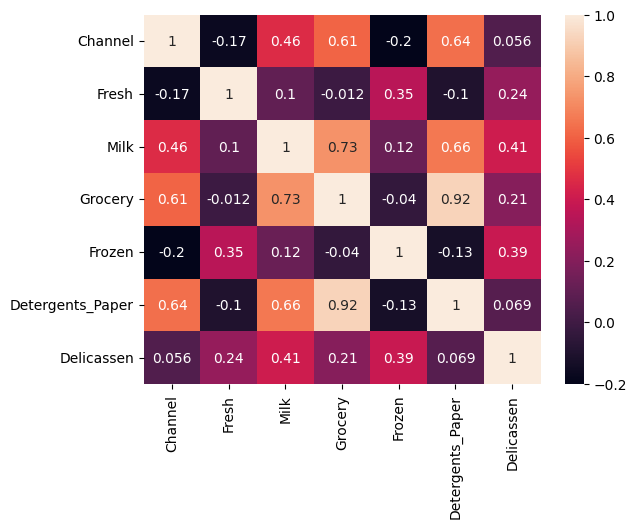

In [8]:

X.corr()
sns.heatmap(X.corr(), annot=True)

## create classes LLM  tabular data

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

<Axes: ylabel='Milk'>

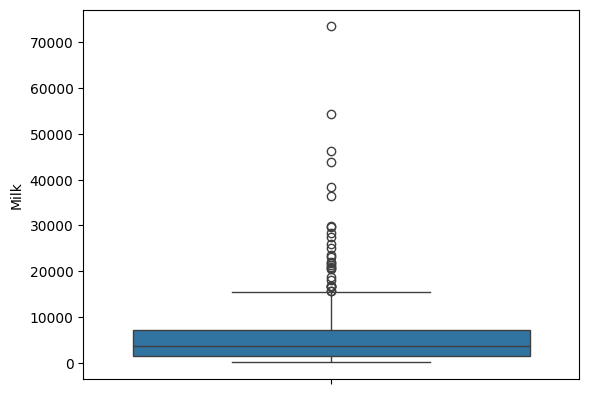

In [11]:
sns.boxplot(X['Milk'])

In [12]:
# Calculate Z-scores
z_scores = np.abs((X - X.mean()) / X.std())
# Define a threshold to identify outliers
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
# Get outliers
outliers_data = X[outliers]
print("Outliers using Z-score method:\n", outliers_data)

Outliers using Z-score method:
      Channel   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
23         2   26373  36423    22019    5154              4337       16523
39         1   56159    555      902   10002               212        2916
47         2   44466  54259    55571    7782             24171        6465
56         2    4098  29892    26866    2616             17740        1340
61         2   35942  38369    59598    3254             26701        2017
65         2      85  20959    45828      36             24231        1423
71         1   18291   1266    21042    5373              4173       14472
85         2   16117  46197    92780    1026             40827        2944
86         2   22925  73498    32114     987             20070         903
87         1   43265   5025     8117    6312              1579       14351
92         2    9198  27472    32034    3232             18906        5130
93         1   11314   3090     2062   35009                71      

In [13]:
# we found a lot of outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
# Define outliers
outliers_iqr = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
# Get outliers
outliers_data_iqr = X[outliers_iqr]
print("Outliers using IQR method:\n", outliers_data_iqr)

Outliers using IQR method:
      Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
2          2   6353   8808     7684    2405              3516        7844
4          2  22615   5410     7198    3915              1777        5185
17         1   5876   6157     2933     839               370        4478
22         1  31276   1917     4469    9408              2381        4334
23         2  26373  36423    22019    5154              4337       16523
..       ...    ...    ...      ...     ...               ...         ...
427        1  31012  16687     5429   15082               439        1163
431        1   8533   5506     5160   13486              1377        1498
435        1  29703  12051    16027   13135               182        2204
436        1  39228   1431      764    4510                93        2346
437        2  14531  15488    30243     437             14841        1867

[108 rows x 7 columns]


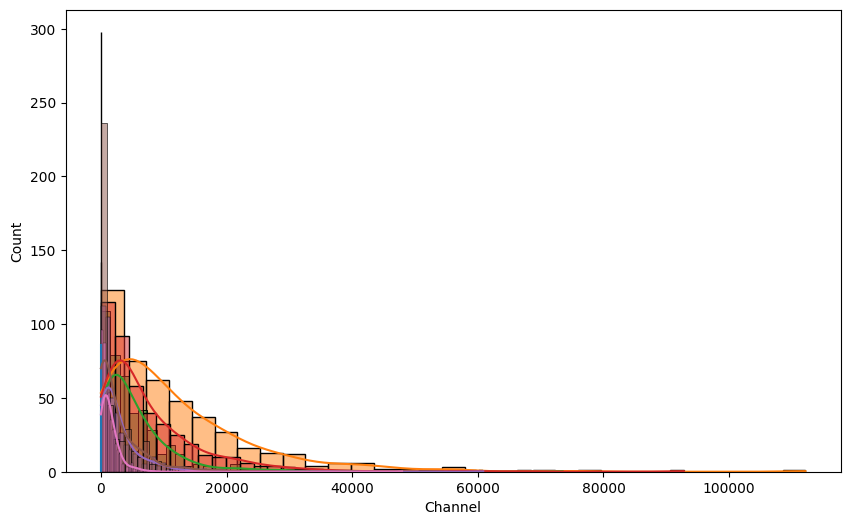

In [15]:
columns = X.columns
plt.figure(figsize=(10,6))
for i in columns:
    sns.histplot(X[i], kde=True, alpha=0.5)

In [16]:
skewness = X.skew()
print("Skewness of each column:")
print(skewness)

Skewness of each column:
Channel              0.760951
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [ ]:
#Interpreting Skewness
#Skewness > 0: The data are right-skewed (long tail on the right).
#Skewness < 0: The data are left-skewed (long tail on the left).
#Skewness ≈ 0: The data are approximately symmetric.

In [22]:
# Pareto principal
#
retail = X[X["Channel"] == 2]
retail["sum"] = retail.iloc[:,1:].sum(axis=1)
ret_sort = retail.sort_values(by="sum", ascending=False)
total_ = ret_sort["sum"].sum()

/var/folders/jf/8m56dyc948d8v7l351v4ggmc0000gn/T/ipykernel_47480/1662801011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail["sum"] = retail.iloc[:,1:].sum(axis=1)


In [27]:
richest = ret_sort["sum"].iloc[:29].sum()

In [34]:
percentage = (richest/total_) * 100
if percentage <= 80:
    print("no Pareto")
else:
    print("pareto is a genius")

no Pareto


**Your observations here**

+ Frozen, Grocery, Milk and Detergents Paper have a high ...
+ 
+ 
+ 



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [36]:
# remove outliers and see what happends
df = X

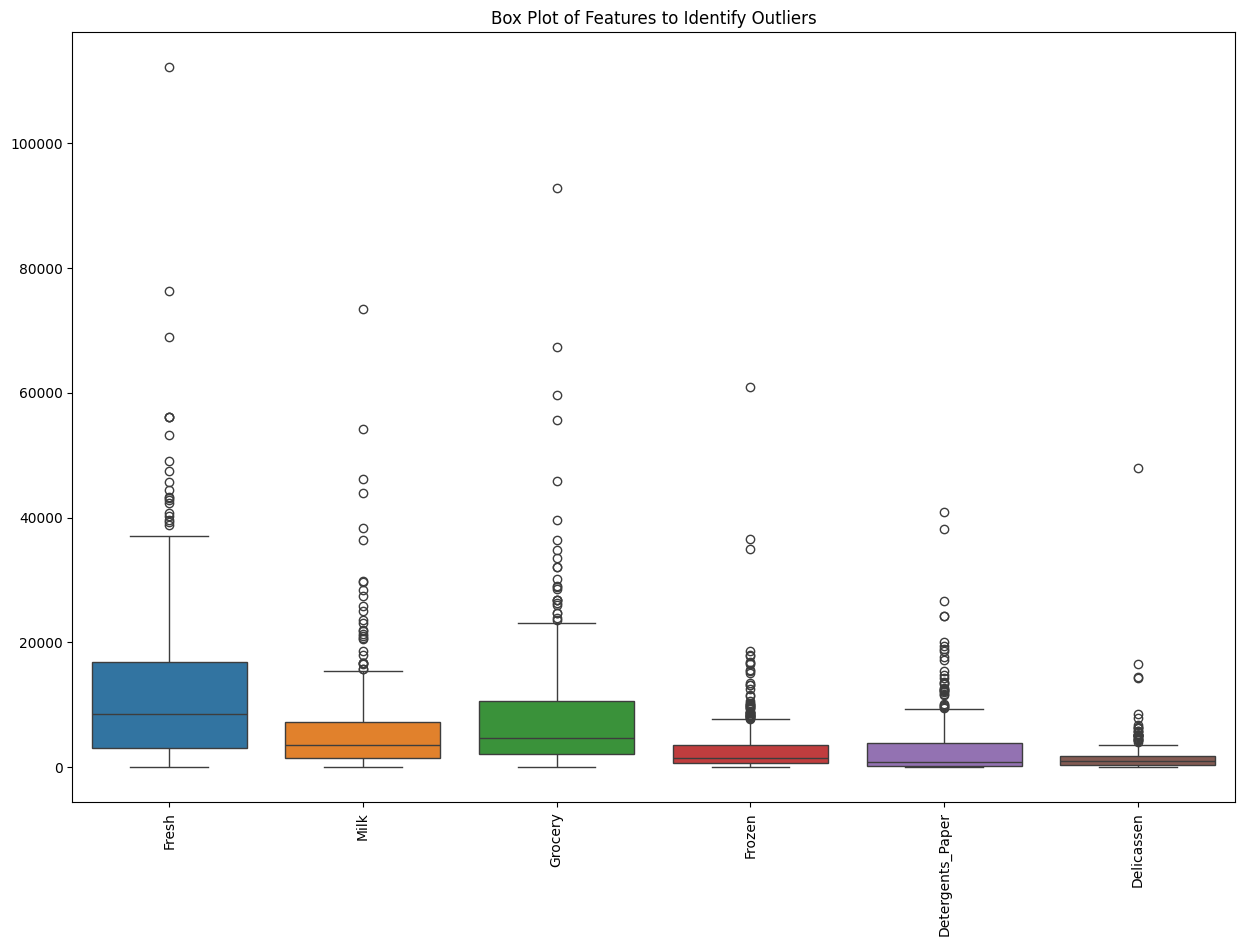

IQR for each column:
Channel                 1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64
Outliers detected:
     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
2          2   6353   8808     7684    2405              3516        7844   
4          2  22615   5410     7198    3915              1777        5185   
17         1   5876   6157     2933     839               370        4478   
22         1  31276   1917     4469    9408              2381        4334   
23         2  26373  36423    22019    5154              4337       16523   
..       ...    ...    ...      ...     ...               ...         ...   
427        1  31012  16687     5429   15082               439        1163   
431        1   8533   5506     5160   13486              1377        1498   
435        1  29703  12051    16027   13135      

In [37]:

# Visualize the data using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.iloc[:, 1:])  # Skip the 'Channel' column
plt.xticks(rotation=90)
plt.title('Box Plot of Features to Identify Outliers')
plt.show()

# Calculate IQR and identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("IQR for each column:")
print(IQR)

# Define a function to identify outliers
def identify_outliers(row):
    for col in df.columns[1:]:  # Skip the 'Channel' column
        if row[col] < (Q1[col] - 1.5 * IQR[col]) or row[col] > (Q3[col] + 1.5 * IQR[col]):
            return True
    return False

# Apply the function to the DataFrame
df['Outlier'] = df.apply(identify_outliers, axis=1)

# Print the outliers
print("Outliers detected:")
print(df[df['Outlier']])

# Optionally, remove outliers
df_no_outliers = df[~df['Outlier']].drop(columns=['Outlier'])

# Print the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers)

In [38]:
df_no_outliers

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
3,1,13265,1196,4221,6404,507,1788
5,2,9413,8259,5126,666,1795,1451
6,2,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...
432,1,21117,1162,4754,269,1328,395
433,1,1982,3218,1493,1541,356,1449
434,1,16731,3922,7994,688,2371,838
438,1,10290,1981,2232,1038,168,2125


In [39]:
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Outlier
0,2,12669,9656,7561,214,2674,1338,False
1,2,7057,9810,9568,1762,3293,1776,False
2,2,6353,8808,7684,2405,3516,7844,True
3,1,13265,1196,4221,6404,507,1788,False
4,2,22615,5410,7198,3915,1777,5185,True
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,True
436,1,39228,1431,764,4510,93,2346,True
437,2,14531,15488,30243,437,14841,1867,True
438,1,10290,1981,2232,1038,168,2125,False


**Your comment here**

+ It seems that...
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [41]:
from sklearn.preprocessing import StandardScaler


customers_scale =  StandardScaler().fit_transform(df_no_outliers)
customers_scale2 = StandardScaler().fit_transform(X)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customers_scale)

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(customers_scale2)

KMeans(n_clusters=3, random_state=42)

In [45]:
labels = kmeans.labels_.tolist()
labels2 = kmeans2.labels_.tolist()

In [49]:
df_no_outliers["cluster"] = labels
X["cluster"] = labels2

In [52]:
df_no_outliers["cluster"].value_counts()

cluster
2    164
0     97
1     71
Name: count, dtype: int64

In [53]:
X["cluster"].value_counts()

cluster
1    241
0    132
2     67
Name: count, dtype: int64

### Looking to the elbow we can choose 2 like the correct number of clusters

In [ ]:
kmeans_2_clean = KMeans(n_clusters=2).fit(customers_scale)
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale2)


labels_2_clean = kmeans_2.predict(customers_scale)
labels_2 = kmeans_2.predict(customers_scale2)

clusters_2_clean = kmeans_2_clean.labels_.tolist()
clusters_2 = kmeans_2.labels_2.tolist()

In [ ]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [ ]:
# Your code here:


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [59]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.55)
dbscan2 = DBSCAN(eps=0.55)

clusters = dbscan.fit_predict(customers_scale)
clusters2 = dbscan2.fit_predict(customers_scale2)


Count the values in `labels_DBSCAN`.

In [61]:
df_no_outliers["cluster_DBSCAN"] = dbscan.labels_.tolist()
X["cluster_DBSCAN"] = dbscan2.labels_.tolist()

In [62]:
df_no_outliers.head(5)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,cluster_DBSCAN
0,2,12669,9656,7561,214,2674,1338,0,-1
1,2,7057,9810,9568,1762,3293,1776,0,-1
3,1,13265,1196,4221,6404,507,1788,1,-1
5,2,9413,8259,5126,666,1795,1451,0,-1
6,2,12126,3199,6975,480,3140,545,0,-1


In [63]:
X.head(5)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Outlier,cluster,cluster_DBSCAN
0,2,12669,9656,7561,214,2674,1338,False,0,0
1,2,7057,9810,9568,1762,3293,1776,False,0,0
2,2,6353,8808,7684,2405,3516,7844,True,0,-1
3,1,13265,1196,4221,6404,507,1788,False,1,1
4,2,22615,5410,7198,3915,1777,5185,True,2,-1


In [64]:
df_no_outliers["cluster_DBSCAN"].value_counts()

cluster_DBSCAN
-1    279
 0     53
Name: count, dtype: int64

In [65]:
X["cluster_DBSCAN"].value_counts()

cluster_DBSCAN
 1    201
-1    170
 0     52
 3     12
 2      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [66]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

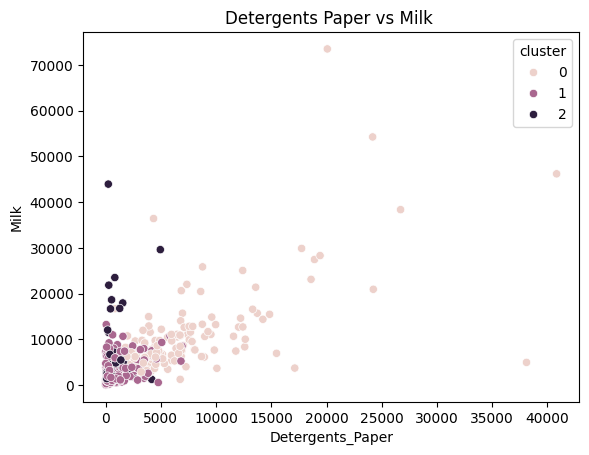

In [68]:
# df_no_outliers  X cluster cluster_DBSCAN
plot(X["Detergents_Paper"], X["Milk"], X["cluster"])

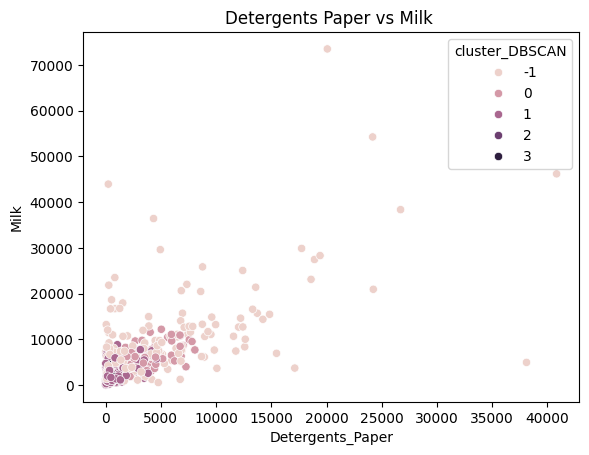

In [69]:
plot(X["Detergents_Paper"], X["Milk"], X["cluster_DBSCAN"])

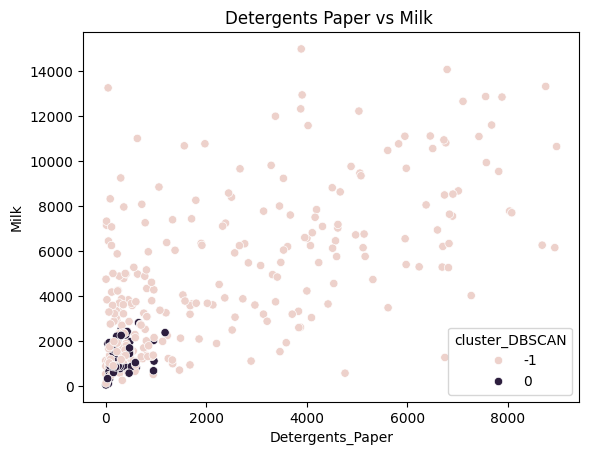

In [70]:
plot(df_no_outliers["Detergents_Paper"], df_no_outliers["Milk"], df_no_outliers["cluster_DBSCAN"])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

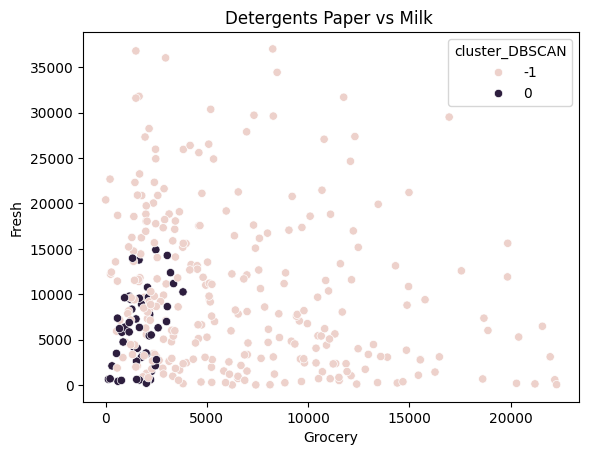

In [71]:
plot(df_no_outliers["Grocery"], df_no_outliers["Fresh"], df_no_outliers["cluster_DBSCAN"])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

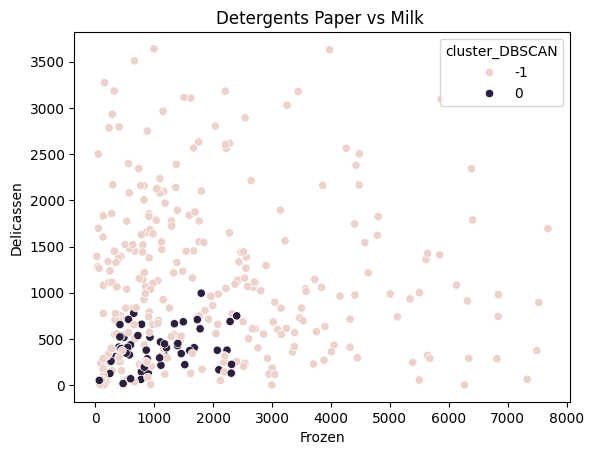

In [77]:
plot(df_no_outliers["Frozen"], df_no_outliers["Delicassen"], df_no_outliers["cluster_DBSCAN"])

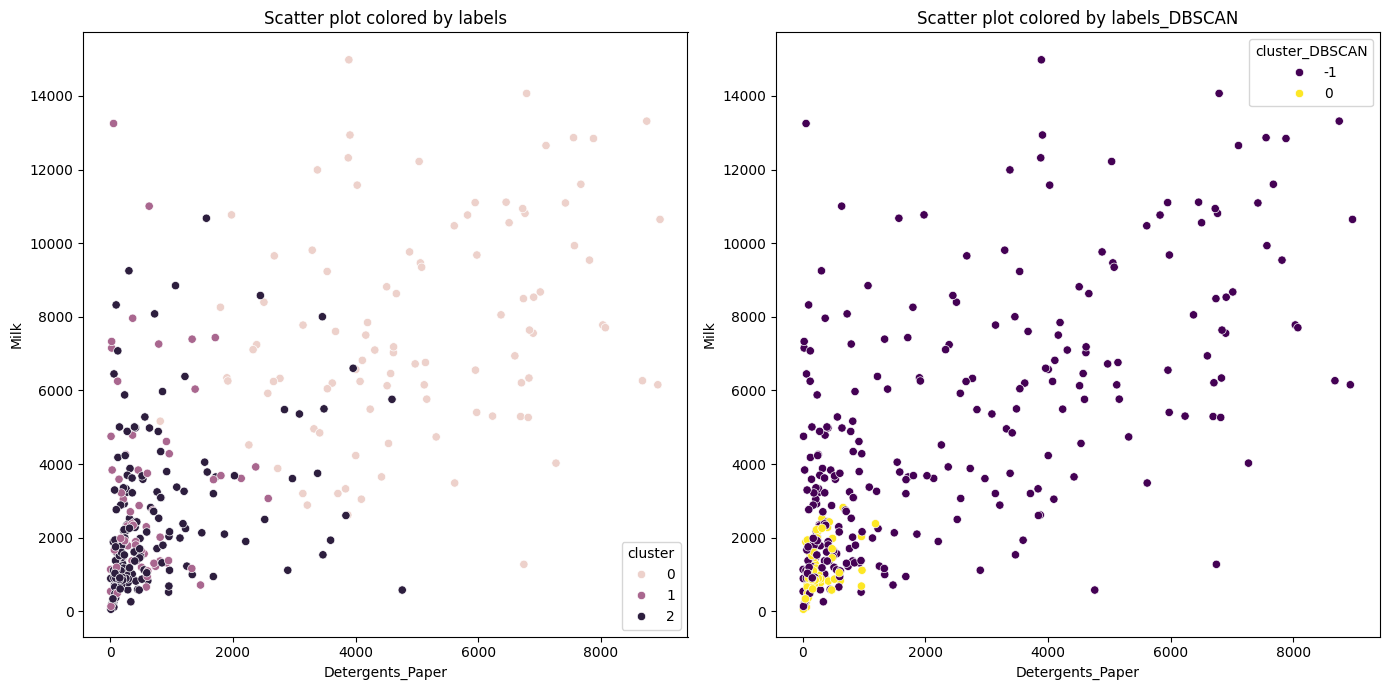

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(ax=axes[0], data=df_no_outliers, x='Detergents_Paper', y='Milk', hue='cluster')
axes[0].set_title('Scatter plot colored by labels')
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Milk')
# Second scatter plot colored by `labels_DBSCAN`
sns.scatterplot(ax=axes[1], data=df_no_outliers, x='Detergents_Paper', y='Milk', hue='cluster_DBSCAN', palette='viridis')
axes[1].set_title('Scatter plot colored by labels_DBSCAN')
axes[1].set_xlabel('Detergents_Paper')
axes[1].set_ylabel('Milk')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [78]:
X.groupby(by=["cluster"]).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Outlier,cluster_DBSCAN
cluster,,,,,,,,,
0,2.000000,8125.121212,11265.075758,17144.439394,1457.121212,7727.151515,1751.818182,0.310606,-0.613636
1,1.016598,10135.161826,2760.838174,3597.406639,2079.344398,804.410788,893.385892,0.000000,0.672199
2,1.089552,26343.895522,5940.373134,5500.313433,9823.701493,806.119403,3349.208955,1.000000,-0.059701


In [79]:
X.groupby(by=["cluster_DBSCAN"]).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Outlier,cluster
cluster_DBSCAN,,,,,,,,,
-1,1.529412,15803.552941,10084.211765,13856.464706,4743.535294,5333.741176,2535.405882,0.535294,0.817647
0,2.000000,6749.365385,6802.365385,9838.230769,854.673077,4409.346154,1230.307692,0.000000,0.019231
1,1.000000,9217.900498,2220.845771,2925.004975,1937.890547,623.308458,793.437811,0.000000,1.000000
2,1.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000,2.000000
3,1.000000,15210.750000,2401.833333,2717.583333,8742.333333,372.416667,1045.250000,1.000000,2.000000


Which algorithm appears to perform better?

**Your observations here**

     The performance of two algorithms would be better but, without many tests we can see that KMeans it's working better, showing the means at firts view KMeans algorithm is clustering clients by Channel, only have 2 Channels and the mean results in th KMeans (1,919, 1,017) are similar to the value of the Channel values (2,1).

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here


**Your comment here**

* Looking the plots for KMeans ...

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here


**Your comment here**

    + Fit DBscan Model have more ...
    
